# 一、准备环境:
在Notebook中导入需要的库,如akshare、pandas、numpy等。

In [1]:
# pip install akshare

# 二、获取数据:
根据需求编写代码,利用akshare获取指定股票的上述字段信息,储存在DataFrame中。

In [2]:
import pandas as pd

df = pd.read_csv('data/stocks_data/浦发银行.csv')

In [3]:
# import akshare as ak

# stock_sse_summary_df = ak.stock_sse_summary()
# print(stock_sse_summary_df)

# 三、数据检查:
检查是否有空值,查看每列的数据类型是否正确。

# 四、补充数据:
如果某些字段数据不全,可以调用其他API补充,如财务数据等。

修改频率分级

股票代码:600000--
股票名称:浦发银行--
行业:银行

总股本:247.21亿股
持股分布:国有持股比例高达63.42%

最近季度净利润:453.64亿元(2022Q3)
最近突出新闻:2022年净利润增长5.5%等

近5日涨跌幅:-1.65%--
technical数据:成交量增长,MACD背离等

当前股价(2023年2月27日):¥8.99
市盈率:5.78(静态市盈率)
市净率:0.59
流通股本:247.21亿股
机构推荐度:增持

In [4]:
import talib as ta

df.set_index('date', inplace=True)
df['5日均线'] = ta.SMA(df['close'], timeperiod=5)
df['涨幅'] = (df['close'] - df['close'].shift(5)) / df['close'].shift(5)
df['RSI'] = ta.RSI(df['close'], timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD12'] = macd
df['MACD_Signal26'] = macdsignal
df['MACD_Histogram9'] = macdhist
df

,open,close,high,low,volume,code,5日均线,涨幅,RSI,MACD12,MACD_Signal26,MACD_Histogram9
date,,,,,,,,,,,,
2005-05-09,-3.457,-3.490,-3.455,-3.492,44088.00,600000,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-10,-3.490,-3.465,-3.455,-3.492,49067.41,600000,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-11,-3.464,-3.462,-3.443,-3.471,55283.35,600000,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-12,-3.443,-3.483,-3.443,-3.483,54174.47,600000,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-13,-3.486,-3.476,-3.458,-3.495,38519.60,600000,-3.4752,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-07,7.570,7.520,7.570,7.490,260129.00,600000,7.5480,-0.010526,66.357753,0.143467,0.111243,0.032224
2023-08-08,7.470,7.520,7.550,7.430,270012.00,600000,7.5320,-0.010526,66.357753,0.140201,0.117035,0.023166
2023-08-09,7.500,7.550,7.550,7.470,177926.00,600000,7.5460,0.009358,67.764946,0.138438,0.121315,0.017122


In [5]:
import akshare as ak

stock_individual_info_em_df = ak.stock_individual_info_em(symbol="600000")
print(stock_individual_info_em_df)

   item                value
0   总市值  202236495368.440002
1  流通市值  202236495368.440002
2    行业                   银行
3  上市时间             19991110
4  股票代码               600000
5  股票简称                 浦发银行
6   总股本        29352176396.0
7   流通股        29352176396.0


In [6]:
import akshare as ak
stock_df = ak.stock_zh_a_hist(symbol='600519', period="daily", start_date='20220101', end_date='20220125', adjust="qfq")
stock_df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2022-01-04,1985.50,1981.73,1999.45,1944.50,33843,6.913653e+09,2.77,0.06,1.23,0.27
1,2022-01-05,1975.50,1954.50,1995.50,1948.50,28396,5.774992e+09,2.37,-1.37,-27.23,0.23
2,2022-01-06,1952.51,1912.72,1966.50,1869.01,51795,1.022693e+10,4.99,-2.14,-41.78,0.41
3,2022-01-07,1905.50,1872.50,1919.38,1869.82,29817,5.831695e+09,2.59,-2.10,-40.22,0.24
4,2022-01-10,1858.51,1896.50,1907.50,1848.05,29627,5.792738e+09,3.17,1.28,24.00,0.24
5,2022-01-11,1878.50,1871.05,1895.50,1861.67,22277,4.332181e+09,1.78,-1.34,-25.45,0.18
6,2022-01-12,1878.50,1897.50,1909.30,1878.50,27474,5.384360e+09,1.65,1.41,26.45,0.22
7,2022-01-13,1895.32,1807.89,1898.49,1796.06,56747,1.078172e+10,5.40,-4.72,-89.61,0.45
8,2022-01-14,1807.89,1797.50,1823.50,1793.50,29322,5.506186e+09,1.66,-0.57,-10.39,0.23
9,2022-01-17,1798.50,1792.11,1808.80,1765.84,27354,5.074078e+09,2.39,-0.30,-5.39,0.22


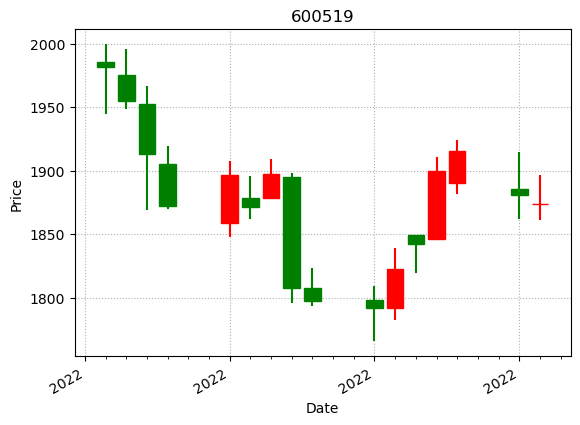

In [7]:
#!/usr/bin/python3
# -*- coding: UTF-8 -*-
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import akshare as ak
 
def stock_data(_symbol,_start_date, _end_date):
    stock_df = ak.stock_zh_a_hist(symbol=_symbol, period="daily", start_date=_start_date, end_date=_end_date, adjust="qfq")
    return stock_df
 
def view_data(df):
    _date = df['日期']
    _open = df['开盘']
    _close = df['收盘']
    _high = df['最高']
    _low = df['最低']
 
    # 绘制收盘价折线图
    plt.figure('K-line')
    plt.title('600519')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.tick_params(labelsize=10)
    plt.grid(linestyle=':')
    # 设置x轴刻度定位器
    ax = plt.gca()
    ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
    ax.xaxis.set_minor_locator(md.DayLocator())
    # 控制实体与影线的颜色
    rise = _close >= _open
    color = np.array(['red' if x else 'green' for x in rise])
    ecolor = np.array(['red' if x else 'green' for x in rise])
    # 绘制实体
    plt.bar(_date, _close - _open,0.8, _open, color=color,edgecolor=ecolor, zorder=3)
    # 绘制影线
    plt.vlines(_date, _low, _high, color=ecolor)
    plt.gcf().autofmt_xdate()
 
    plt.show()
 
    return
 
def main():
    df = stock_data('600519','20220101','20220125') #600519 贵州茅台
    view_data(df)
 
if __name__ == '__main__': 
    main()

# 五、数据处理:
处理空值,修改错误数据类型,新增计算所需字段等。

# 六、分析可视化:
使用pandas、matplotlib等模块进行数据分析,如描述统计、走势图等。

# 七、模型预测:
利用sklearn等机器学习库建立模型,进行股票预测。

# 八、构建Dashboard:
使用Notebook的交互功能,构建可交互的股票数据面板。

# 九、生成报告:
输出分析结果,综合生成报告文档。

# 十、参数控制:
设定函数及Notebook参数,实现快速改变股票和日期范围。